In [2]:
import numpy as np
import math
import cv2
import sys
import scipy.io as sio
import matplotlib.pyplot as plt
#data = scipy.io.loadmat('G:\MachineLearning\wiki\wiki\wiki.mat') # 假设文件名为1.mat
#print(data["wiki"])

In [101]:
def load_wiki(wiki_path, target_size = (224,224), num_data = None):
    mat_path = wiki_path + 'wiki_with_age.mat'
    
    data = sio.loadmat(mat_path)
    wiki_data = data['wiki'][0][0]
   
    full_num_data = len(wiki_data[6][0])
    if num_data is None or num_data > full_num_data :
        num_data = full_num_data
        
    
    full_X_data = np.zeros([num_data, 224, 224, 3])
    full_y_data = np.zeros([num_data])
    data_count = 0
    #len(wiki_data[6][0])
    for i in range(num_data):

        face_score =wiki_data[6][0][i]
        if face_score != float("-inf"):
            full_path = wiki_path + wiki_data[2][0][i][0]
            img = cv2.imread(full_path)
            age = wiki_data[8][0][i]
            date_of_birth = wiki_data[0][0][i]  #下面的657438是出生于1800年的Matlab serial date number
            if img is not None and date_of_birth > 657438 and age >= 0 and age <= 100:
                face_loc = wiki_data[5][0][i][0]
                face_loc = face_loc.astype("int32")
                roi_img = img[face_loc[1]:face_loc[3], face_loc[0]:face_loc[2]]
                face_img = cv2.resize(roi_img, target_size)
                full_X_data[data_count] = face_img
               
                gender = wiki_data[3][0][i]
                full_y_data[data_count] = gender * 100 + age #一共分为200类，0-99是女性的1-100岁，100-199是男性的1-100岁
                
                data_count += 1
    X_data = full_X_data[:data_count]
    y_data = full_y_data[:data_count]
    
    return X_data, y_data

In [32]:
def get_wiki_data(wiki_path, target_size = (224,224), num_training=49000, num_validation=1000, num_test=1000,):
   
    X_data, y_data = load_wiki(wiki_path, target_size = target_size, num_data = num_training + num_validation + num_test)
    mask = list[:-(num_validation + num_test)]
    X_train = X_data[mask]
    y_train = y_data[mask]
    mask = list[len(y_train) : -num_test]
    X_val = X_data[mask]
    y_val = y_data[mask]
    mask = list[-num_test]
    X_test = X_data[mask]
    y_test = y_data[mask]
    """
    if X_data.shape[0] > num_training + num_validation + num_test:
        # Subsample the data
        mask = list(range(num_training + num_validation ,  num_training + num_validation + num_test))
        X_test = X_data[mask]
        y_test = y_data[mask]
        mask = list(range(num_training, num_training + num_validation))
        X_val = X_data[mask]
        y_val = y_data[mask]
        mask = list(range(num_training))
        X_train = X_data[mask]
        y_train = y_data[mask]
    """
    # Normalize the data: subtract the mean image
    if subtract_mean:
        mean_image = np.mean(X_data, axis=0)
        X_train -= mean_image
        X_val -= mean_image
        X_test -= mean_image

    # Transpose so that channels come first
    X_train = X_train.transpose(0, 3, 1, 2).copy()
    X_val = X_val.transpose(0, 3, 1, 2).copy()
    X_test = X_test.transpose(0, 3, 1, 2).copy()

    # Package data into a dictionary
    return {
      'X_train': X_train, 'y_train': y_train,
      'X_val': X_val, 'y_val': y_val,
      'X_test': X_test, 'y_test': y_test,
    }
    

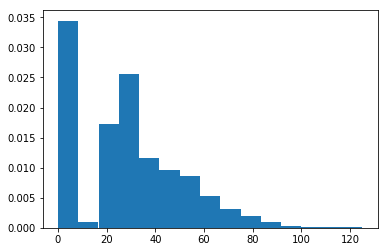

2000
1427
(2000, 224, 224, 3)
(2000,)
man:  0.7526278906797477


In [102]:

wiki_path = ""
if sys.platform == "linux" :
    wiki_path = "/devdata/wiki/"
else:
    wiki_path = "G:\\MachineLearning\\wiki\\wiki\\"

mat_path = wiki_path + 'wiki_with_age.mat'

load_wiki(wiki_path)

In [77]:
temp = cv2.imread("C:\\Users\\Z\\Desktop\\2006361_1907-12-25_1945.gif")
print(temp.shape)
cv2.imshow(temp)
cv2.waitKey()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
import numpy as np
import math
import cv2
import sys
import scipy.io as sio

wiki_path = ""
if sys.platform == "linux" :
        wiki_path = "/devdata/wiki/"
else:
        wiki_path = "G:\\MachineLearning\\wiki\\wiki\\"
            
load_wiki(wiki_path, num_training=49000, num_validation=1000, num_test=1000,)
